In [3]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Files loading 
ride_data_to_load = "Resources/ride_data.csv"
city_data_to_load = "Resources/city_data.csv"

# Files reading
ride_data = pd.read_csv(ride_data_to_load)
city_data = pd.read_csv(city_data_to_load)

# Combining both files
pyber = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
# Bubble Plot of Ride Sharing Data

#Grouping dataframe by city, Urban, Suburban, Rural

urban_city = pyber[pyber["type"] == "Urban"].groupby([pyber["city"]])
rural_city = pyber[pyber["type"] == "Rural"].groupby([pyber["city"]])
suburban_city = pyber[pyber["type"] == "Suburban"].groupby([pyber["city"]])

# Urban: ride count as x, fare average as y, and driver count as s
x_urban = urban_city["ride_id"].count()
y_urban = urban_city["fare"].mean()
s_urban = urban_city["driver_count"].mean()

# Rural: ride count as x, fare average as y, and driver count as s
x_rural = rural_city["ride_id"].count()
y_rural = rural_city["fare"].mean()
s_rural = rural_city["driver_count"].mean()

# Suburban: ride count as x, fare average as y, and driver count as s
x_suburban = suburban_city["ride_id"].count()
y_suburban = suburban_city["fare"].mean()
s_suburban = suburban_city["driver_count"].mean()

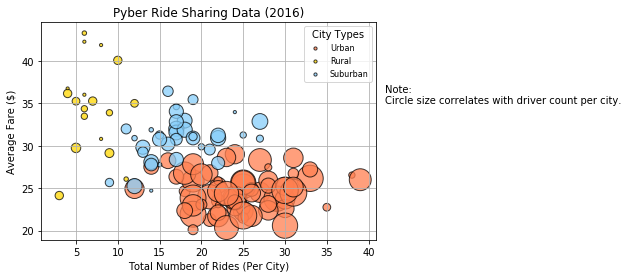

In [6]:
# Building  scatter plots for urban, Rural, and Suburban
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")

# Formatting Plot
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Creating a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [10]
legend.legendHandles[2]._sizes = [10]

# Note text
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save figure 
plt.savefig("Resources/PyberRideSharingData.png", bbox_inches="tight")

plt.grid(True)

# Show plot
plt.show()


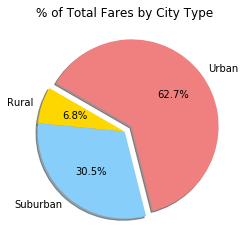

In [20]:
# Total Fares by City Type

# Calculate Type Percents

type_groupped = pyber.groupby(['type'])
fare_sum = type_groupped['fare'].sum()

# Build Pie Chart

labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Resources/TotalFaresbyCityType.png")

# Show Figure
plt.show()


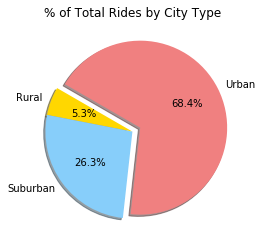

In [8]:
# Total Rides by City Type

# Calculate Type Percents
rides_count = type_groupped['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Resources/TotalRidesbyCityType.png")

# Show Figure
plt.show()

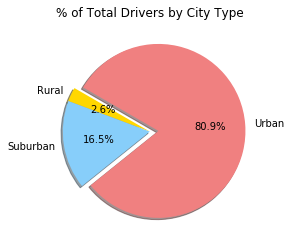

In [9]:
# Calculate Type Percents
type_groupped_drivers = city_data.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Resources/TotalDriversbyCityType.png")

# Show Figure
plt.show()